Name - Aditya Kothari

Roll no. - I028

Batch - B1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

Task-1

In [2]:
df=pd.read_csv('/content/MLR_data.csv')

In [3]:
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [4]:
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [5]:
df.size

120

In [6]:
df.describe()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
count,24.000000,24.000000,24.000000,24.00000,24.000000
mean,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,0.510754,3.526299,0.349527,0.33002,210.735341
min,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,2017.000000,12.000000,2.750000,6.20000,1464.000000


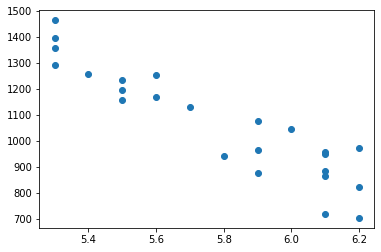

In [7]:
x=df["Unemployment_Rate"]
y=df["Stock_Index_Price"]
plt.scatter(x,y)

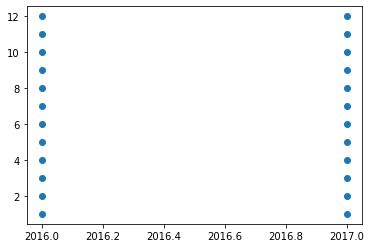

In [8]:
x=df["Year"]
y=df["Month"]
plt.scatter(x,y)

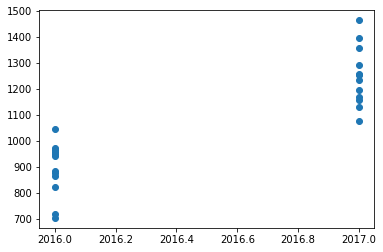

In [9]:
x=df["Year"]
y=df["Stock_Index_Price"]
plt.scatter(x,y)

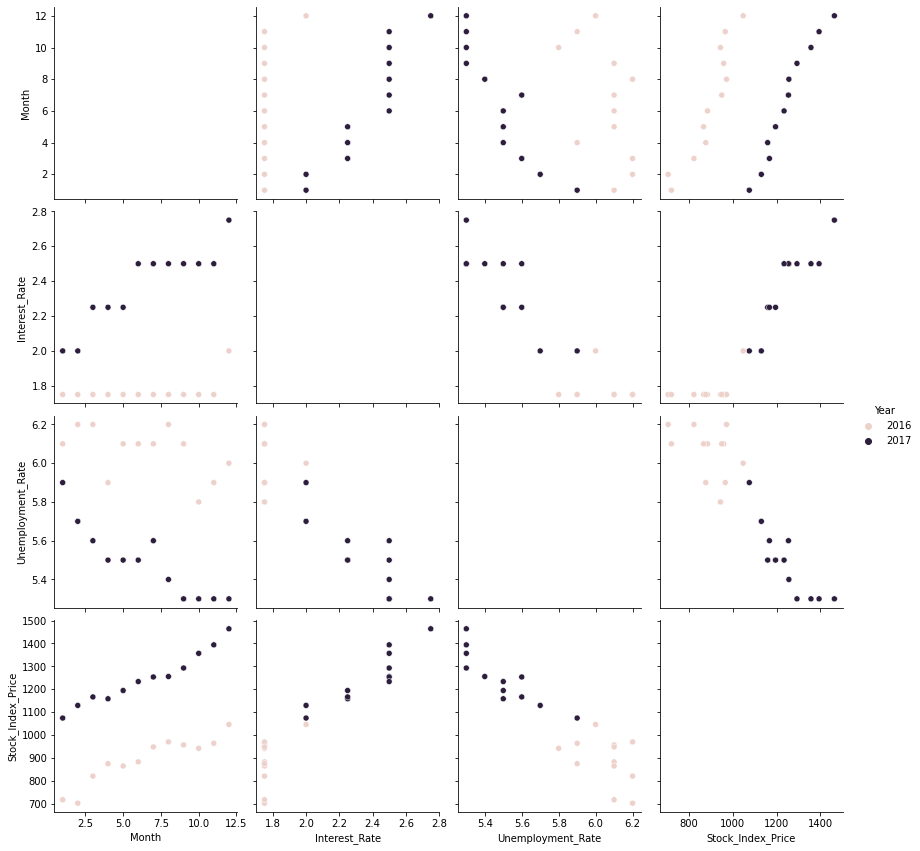

In [10]:
sns.pairplot(df,hue='Year',height=3, diag_kind='scatter')

As the unemployment rate increases, the stock index price decreases.

Unemployment rate is not linearly related with the month, it's scattered.

Stock Index price and month are linearly dependent.

Task-2

Interest rate vs stock index price

In [11]:
model = LinearRegression()
x=np.array(df["Interest_Rate"])
y=np.array(df["Stock_Index_Price"])
x=x.reshape((-1,1))
model.fit(x,y)
r2 = model.score(x, y)
b0 = model.intercept_
b1 = model.coef_[0]

print("r2:", r2)
print("b0(Intercept):", b0)
print("b1(Slope):", b1)
p=model.predict(np.array(2.75).reshape(-1,1))
print("Predicted value of stock index price for interest rate of 2.75 : ",p)
msq=0.5*(p-1464)**2
print("Mean square error = ",msq)

r2: 0.8757089547891359
b0(Intercept): -99.46431881371655
b1(Slope): 564.2038924930492
Predicted value of stock index price for interest rate of 2.75 :  [1452.09638554]
Mean square error =  [70.84801858]


Unemployment vs stock index price


In [12]:
model = LinearRegression()
x=np.array(df["Unemployment_Rate"])
y=np.array(df["Stock_Index_Price"])
x=x.reshape((-1,1))
model.fit(x,y)
r2 = model.score(x, y)
b0 = model.intercept_
b1 = model.coef_[0]

print("r2:", r2)
print("b0(Intercept):", b0)
print("b1(Slope):", b1)
p1=model.predict(np.array(6).reshape(-1,1))
print("Predicted value of stock index price for unemployment rate of 6 : ",p1)
msq1=0.5*(p1-1047)**2
print("Mean square error = ",msq1)

r2: 0.850706607677214
b0(Intercept): 4471.339321357287
b1(Slope): -588.9620758483036
Predicted value of stock index price for unemployment rate of 6 :  [937.56686627]
Mean square error =  [5987.80537926]


Task-3


In [32]:
model = LinearRegression()
x1=np.array(df[["Interest_Rate","Unemployment_Rate"]])
y1=np.array(df["Stock_Index_Price"])
x1=x1.reshape((-1,2))
model.fit(x1,y1)
r2 = model.score(x1, y1)
b0 = model.intercept_
b1 = model.coef_[0]

print("r2:", r2)
print("b0(Intercept):", b0)
print("b1(Slope):", b1)
p=model.predict(np.array([2.75,5.3]).reshape(-1,2))
print("Predicted value of stock index price for interest rate = 2.75 and unemployment rate = 5.3 : ",p)
p1=model.predict(np.array([2,6]).reshape(-1,2))
print("Predicted value of stock index price for interest rate = 2 and unemployment rate = 6 : ",p1)

r2: 0.8976335894170216
b0(Intercept): 1798.4039776258544
b1(Slope): 345.54008701056574
Predicted value of stock index price for interest rate = 2.75 and unemployment rate = 5.3 :  [1422.86238865]
Predicted value of stock index price for interest rate = 2 and unemployment rate = 6 :  [988.60472343]


In [33]:
result=sm.OLS(y1,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2508.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    1.10e-26
Time:                        05:26:13   Log-Likelihood:                         -136.70
No. Observations:                  24   AIC:                                      277.4
Df Residuals:                      22   BIC:                                      279.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           558.9088     34.043     16.418      0.000     488.308     629.510
x2           -15.4025     12.366     -1.246      0.226     -41.047      10.242
==============================================================================
Omnibus:                        4.661   Durbin-Watson:                   0.513
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                3.139
Skew:                          -0.870   Prob(JB):                        0.208
Kurtosis:                       3.330   Cond. No.                         14.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multiple regression model is better than Simple linear regression model

Task-4

In [19]:
df2=pd.read_csv("/content/50_Startups.csv")

In [20]:
df2

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


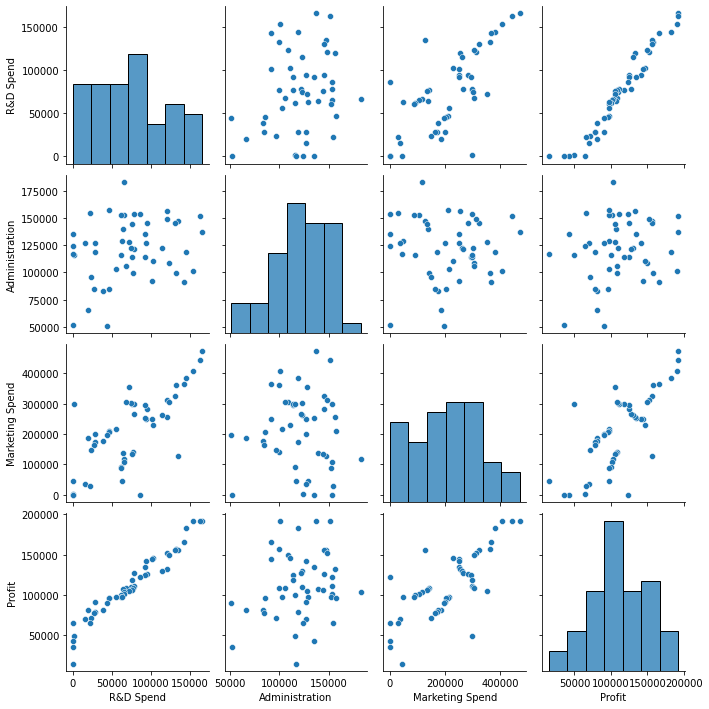

In [16]:
sns.pairplot(df2)

In [26]:
model1 = LinearRegression()
x=np.array(df2[["R&D Spend" , "Administration" , "Marketing Spend"]])
y=np.array(df2["Profit"])
x=x.reshape((-1,3))
model.fit(x,y)
r2 = model.score(x, y)
b0 = model.intercept_
b1 = model.coef_[0]

print("r2:", r2)
print("b0(Intercept):", b0)
print("b1(Slope):", b1)

r2: 0.9507459940683246
b0(Intercept): 50122.19298986524
b1(Slope): 0.8057150499157437


In [30]:
result=sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1232.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):                    1.17e-44
Time:                        05:23:47   Log-Likelihood:                         -545.82
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      47   BIC:                                      1103.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7180      0.065     11.047      0.000       0.587       0.849
x2             0.3277      0.031     10.458      0.000       0.265       0.391
x3             0.0822      0.022      3.733      0.001       0.038       0.126
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                          -0.126   Prob(JB):                        0.688
Kurtosis:                       2.456   Cond. No.                         9.76
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multiple Linear Regression model is better than simple linear regression model.